## Fundamentals of Linear Algebra

### Matrix Product

* $A$ is of shape $m \times n$
* $B$ is of shape $n \times p$
* $C$ is of shape $m \times p$
* Similar to computing the dot product of vector $A_i$ and $B_j$ where $A_i$ is the $i$-th row of $A$ and $B_j$ is the $j$-th column of $B$

$$
C=AB
$$

$$
C_{i,j} = \sum_{k} A_{i,k}B_{k,j}
$$

<div align="center">

![Matrix Multiplication Visualization](media/matrix_multiplication.png)

*Figure 1: Matrix multiplication*

</div>

**Properties of Matrix Multiplication**

* Associative: $(AB)C = A(BC)$
* Distributive: $A(B + C) = AB + AC$
* Not commutative: $AB \neq BA$

### Hadamard Product

* Element-wise product
* $A$ and $B$ must have the same shape

$$
C = A \odot B
$$

$$
C_{i,j} = A_{i,j}B_{i,j}
$$

### Linear System of Equations

* $A \in \mathbb{R}^{m \times n}$
* $x \in \mathbb{R}^{n}$
* $b \in \mathbb{R}^{m}$

$$
Ax = b \\
A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n = b_1 \\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n = b_2 \\
\vdots \\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n = b_m
$$

### Identity and Inverse Matrices

**Identity Matrix**
* A matrix that does not change any vector when we multiply that vector with the matrix
* $I \in \mathbb{R}^{n \times n}$
$$
\forall x \in \mathbb{R}^n, I_n x = x
$$

**Inverse Matrix**
* A matrix that, when multiplied with its inverse, yields the identity matrix
* $A^{-1} \in \mathbb{R}^{n \times n}$

$$
A A^{-1} = I_n
$$

### Norms
* Norm - a function used to measure the size of a vector, mapping a vector to a non-negative scalar
* $L^{(p)}$ norm is defined as (for $p \in \mathbb{R}, p \geq 1$)

$$
||x||_p = \left( \sum_{i=1}^n |x_i|^p \right)^{\frac{1}{p}}
$$

**Mathematical Definition**
Any norm satisfies the following properties:
1) $f(x)=0 \Rightarrow x=0$
2) $f(x+y) \leq f(x) + f(y)$
3) $\forall \alpha \in \mathbb{R}, f(\alpha x) = |\alpha| f(x)$

**Euclidean Norm**
* Also called $L^2$ norm
* Simply the Euclidean distance from the origin to the point $x$

$$
||x||_2 = \sqrt{\sum_{i=1}^n x_i^2}
$$

**$L^1$ Norm**
* Used when differences between zero and non-zero values are important
* Also called Manhattan norm

$$
||x||_1 = \sum_{i=1}^n |x_i|
$$

**$L^\infty$ Norm**
* Also called Maximum norm
* Measures the maximum absolute value of the vector's components

$$
||x||_\infty = \max_{i=1}^n |x_i|
$$

**Frobenius Norm** 
* Also called Euclidean norm
* Measures the Euclidean distance of the matrix from the origin

$$
||A||_F = \sqrt{\sum_{i=1,j=1}^{m,n} a_{ij}^2}
$$

## Special Matrices

**Diagonal Matrix**
* A square matrix with all off-diagonal elements equal to zero
* Has non-zero elements only on its main diagonal
* Useful for scaling the components of a vector

$$
\text{diag}(v)x=v\odot x
$$

* Inverse only exists if all diagonal elements are non-zero

**Symmetric Matrix**
* A square matrix that is equal to its transpose
* Has the same elements above and below the main diagonal

$$
A = A^T
$$

**Unit Vector**
* Vector with unit norm

$$
||x||_2 = 1
$$

**Orthogonal vs Orthonormal**
* Orthogonal vectors are perpendicular to each other
* Orthonormal vectors are orthogonal and have unit norm

$$
x^T y = 0
$$

* Orthogonal matrix is a square matrix whose columns and rows are mutually orthonormal

## Eigendecomposition

**Analogy with numbers**
- Any number can be represented via prime numbers
- $12 = 2 \times 2 \times 3$
- This gives us useful properties about the number - e.g. it's not divisible by 5

**Eigenvector**
- A non-zero vector $v$ such, that a square matrix multiplication $A$ only alters the scale of $v$
$$
Av = \lambda v
$$
- $\lambda$ is the eigenvalue corresponding to this eigenvector
- If $v$ is an eigenvector of $A$, then so is any $s$ for $s \in \mathbb{R}, s\neq0$

**Eigendecomposition**
* $A$ has $n$ linearly independent eigenvectors $\left\{ v^{(1)}, ..., v^{(n)}\right\}$
* These can be assembled together into a matrix $V$ where each column is an eigenvector $v^{(i)}$
* $A$ has $n$ eigenvalues, which can be represented as a vector $\lambda = \left\{ \lambda_1,..., \lambda_n \right\}$
* Thus eigendecomposition of $A$ is:
$$
A = V \text{diag}(\lambda)V^{(-1)}
$$
* Every real symmetric matrix can be decomposed into an expression using only real-valued eigenvectors and eigenvalues
$$
A = Q \Lambda Q^{T}
$$
* $Q$ is an orthogonal matrix composed of eigenvectors of $A$
* $\Lambda$ is a diagonal matrix where every $\Lambda_{i,i}$ is associated with eigenvector on column $i$ of Q
* By convention, the eigenvalues of $\Lambda$ are sorted from highest to lowerst
* Matrix is signular if any of the eigenvalues are 0

In [9]:
import numpy as np

A = np.array([[4, 1], [2, 3]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print(f"A:\n{A}")
print(f"Eigenvalues:\n{eigenvalues}")

# Numpy normalizes eigenvectors to have unit norm
print(f"Eigenvectors:\n{eigenvectors}")

V = eigenvectors
V_inv = np.linalg.inv(V)
diag_lambda = np.diag(eigenvalues)

A_reconstructed = V @ diag_lambda @ V_inv

print(f"A reconstructed:\n{A_reconstructed}")

A:
[[4 1]
 [2 3]]
Eigenvalues:
[5. 2.]
Eigenvectors:
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]
A reconstructed:
[[4. 1.]
 [2. 3.]]


## The Trace Operator
* Gives the sum of all diagonal entries of a matrix
$$
\text{Tr}(A) = \sum_i^{n} A_{i,i}
$$
* Useful for computation, example:
$$
||A||_F = \sqrt{\text{Tr}(AA^T)}
$$
**Properties**
$$
\text{Tr}(A) = \text{Tr}(A^T)
$$
$$
\text{Tr}(ABC) = \text{Tr}(CAB) = \text{Tr}(BCA)
$$
$$
a = \text{Tr}(a)
$$

## Determinant
* Equal to the product of all the eigenvalues of the matrix
* $|\det{A}|$ shows how much multiplication by the matrix contracts or expands spaces
* $\det{A} = 1$ - the transformation preserves the volume of the space

## Principal Component Analysis (PCA)
* Statistical procedure for dimensionality reduction

X: 
[[ 0.87088609  0.64822232  0.55611294]
 [ 2.29058253  0.34099879 -0.91104676]
 [ 1.12364182 -0.14056709 -0.19847601]
 [-0.53556659 -2.14606608 -0.60004079]
 [-2.48621363 -0.41482721 -0.37222535]]
X_centered: 
[[ 0.89225182  0.68936161  0.63722234]
 [ 2.31194827  0.38213808 -0.82993737]
 [ 1.14500756 -0.0994278  -0.11736661]
 [-0.51420086 -2.10492679 -0.51893139]
 [-2.4648479  -0.37368792 -0.29111595]]
U: 
[[-0.05547699  0.11121508 -0.02222521]
 [-0.16657911  0.02699018 -0.17283725]
 [-0.05131104  0.02866051 -0.10221454]
 [ 0.13213841 -0.13575668 -0.10211523]
 [ 0.12298738 -0.12855544  0.17615334]]
S: 
[11.17973992 10.04924369  9.39752195]
Vt: 
[[-0.51063339 -0.70011798  0.49908752]
 [ 0.36992612  0.34510035  0.86258937]
 [-0.7761496   0.62509244  0.08277217]]


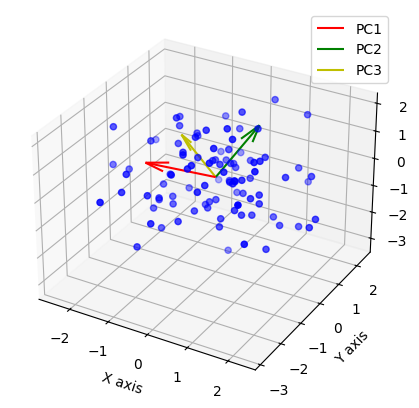

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### PCA Example with 3D data points

# 0. Data points are 3D vectors
X = np.random.randn(100, 3)
print(f"X: \n{X[:5, :]}")

# 1. Center the data points
X_centered = X - np.mean(X, axis=0)
print(f"X_centered: \n{X_centered[:5, :]}")

# 2. SVD-based PCA
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
print(f"U: \n{U[:5, :]}")
print(f"S: \n{S}")
print(f"Vt: \n{Vt[:3, :]}")

# 3. Principal components
principal_components = Vt

# Visualize the principal components
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2], c='blue', marker='o')
origin = [0, 0, 0]
for i in range(len(S)):
    ax.quiver(*origin, *Vt[i, :]*2, color=['r', 'g', 'y'][i], label=f'PC{i+1}')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.legend()
plt.show()


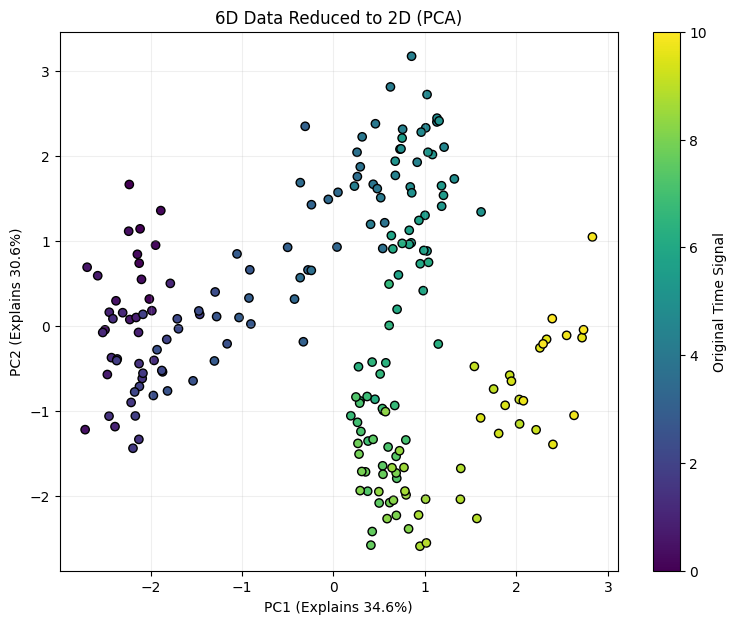

In [23]:
# 200 samples with 6 features
np.random.seed(42)
n_samples = 200

# Two hidden "true" signals
t = np.linspace(0, 10, n_samples)
signal1 = t
signal2 = np.sin(t)

# 6D data: some features follow signals, some are pure noise
X = np.zeros((n_samples, 6))
X[:, 0] = signal1 + np.random.normal(0, 0.4, n_samples) # Signal 1
X[:, 1] = signal2 + np.random.normal(0, 0.4, n_samples) # Signal 2
X[:, 2] = signal1 * 0.5 + np.random.normal(0, 0.2, n_samples) # Redundant
X[:, 3] = signal2 * 2.0 + np.random.normal(0, 0.2, n_samples) # Redundant
X[:, 4] = np.random.normal(0, 1.5, n_samples) # Pure Noise A
X[:, 5] = np.random.normal(0, 1.5, n_samples) # Pure Noise B

# Step 1: Standardize the data (Mean = 0, Std = 1)
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Step 2: Perform SVD
U, S, Vt = np.linalg.svd(X_std, full_matrices=False)

# Step 3: Project the 6D data into 2D (using first 2 PCs)
# We multiply the standardized data by the first two rows of Vt (transposed)
X_pca = X_std @ Vt[:2, :].T

# Step 4: Calculate Explained Variance for the labels
var_exp = (S**2) / np.sum(S**2)

# 4. Visualization
plt.figure(figsize=(9, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=t, cmap='viridis', edgecolors='k')
plt.title("6D Data Reduced to 2D (PCA)")
plt.xlabel(f"PC1 (Explains {var_exp[0]*100:.1f}%)")
plt.ylabel(f"PC2 (Explains {var_exp[1]*100:.1f}%)")
plt.colorbar(scatter, label='Original Time Signal')
plt.grid(True, alpha=0.2)
plt.show()